In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

df = pd.read_csv('https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv')

def get_result(row):
    if pd.isnull(row['score1']):
        return np.nan
    if row['score1'] > row['score2']:
        return 'H'
    elif row['score1'] < row['score2']:
        return 'A'
    else:
        return 'D'

df = df[df['league'] != 'UEFA Champions League']    
df = df[df['league'] != 'UEFA Europa League'] 
df = df[df['league'] != 'UEFA Europa Conference League'] 
# Aplicar a função para criar a coluna 'result'
df['result'] = df.apply(get_result, axis=1)

df.loc[df['result'] == 'H', 'home_Points'] = 3
df.loc[df['result'] == 'D', 'home_Points'] = 1
df.loc[df['result'] == 'A', 'home_Points'] = 0
df.loc[df['result'] == 'A', 'away_Points'] = 3
df.loc[df['result'] == 'D', 'away_Points'] = 1
df.loc[df['result'] == 'H', 'away_Points'] = 0

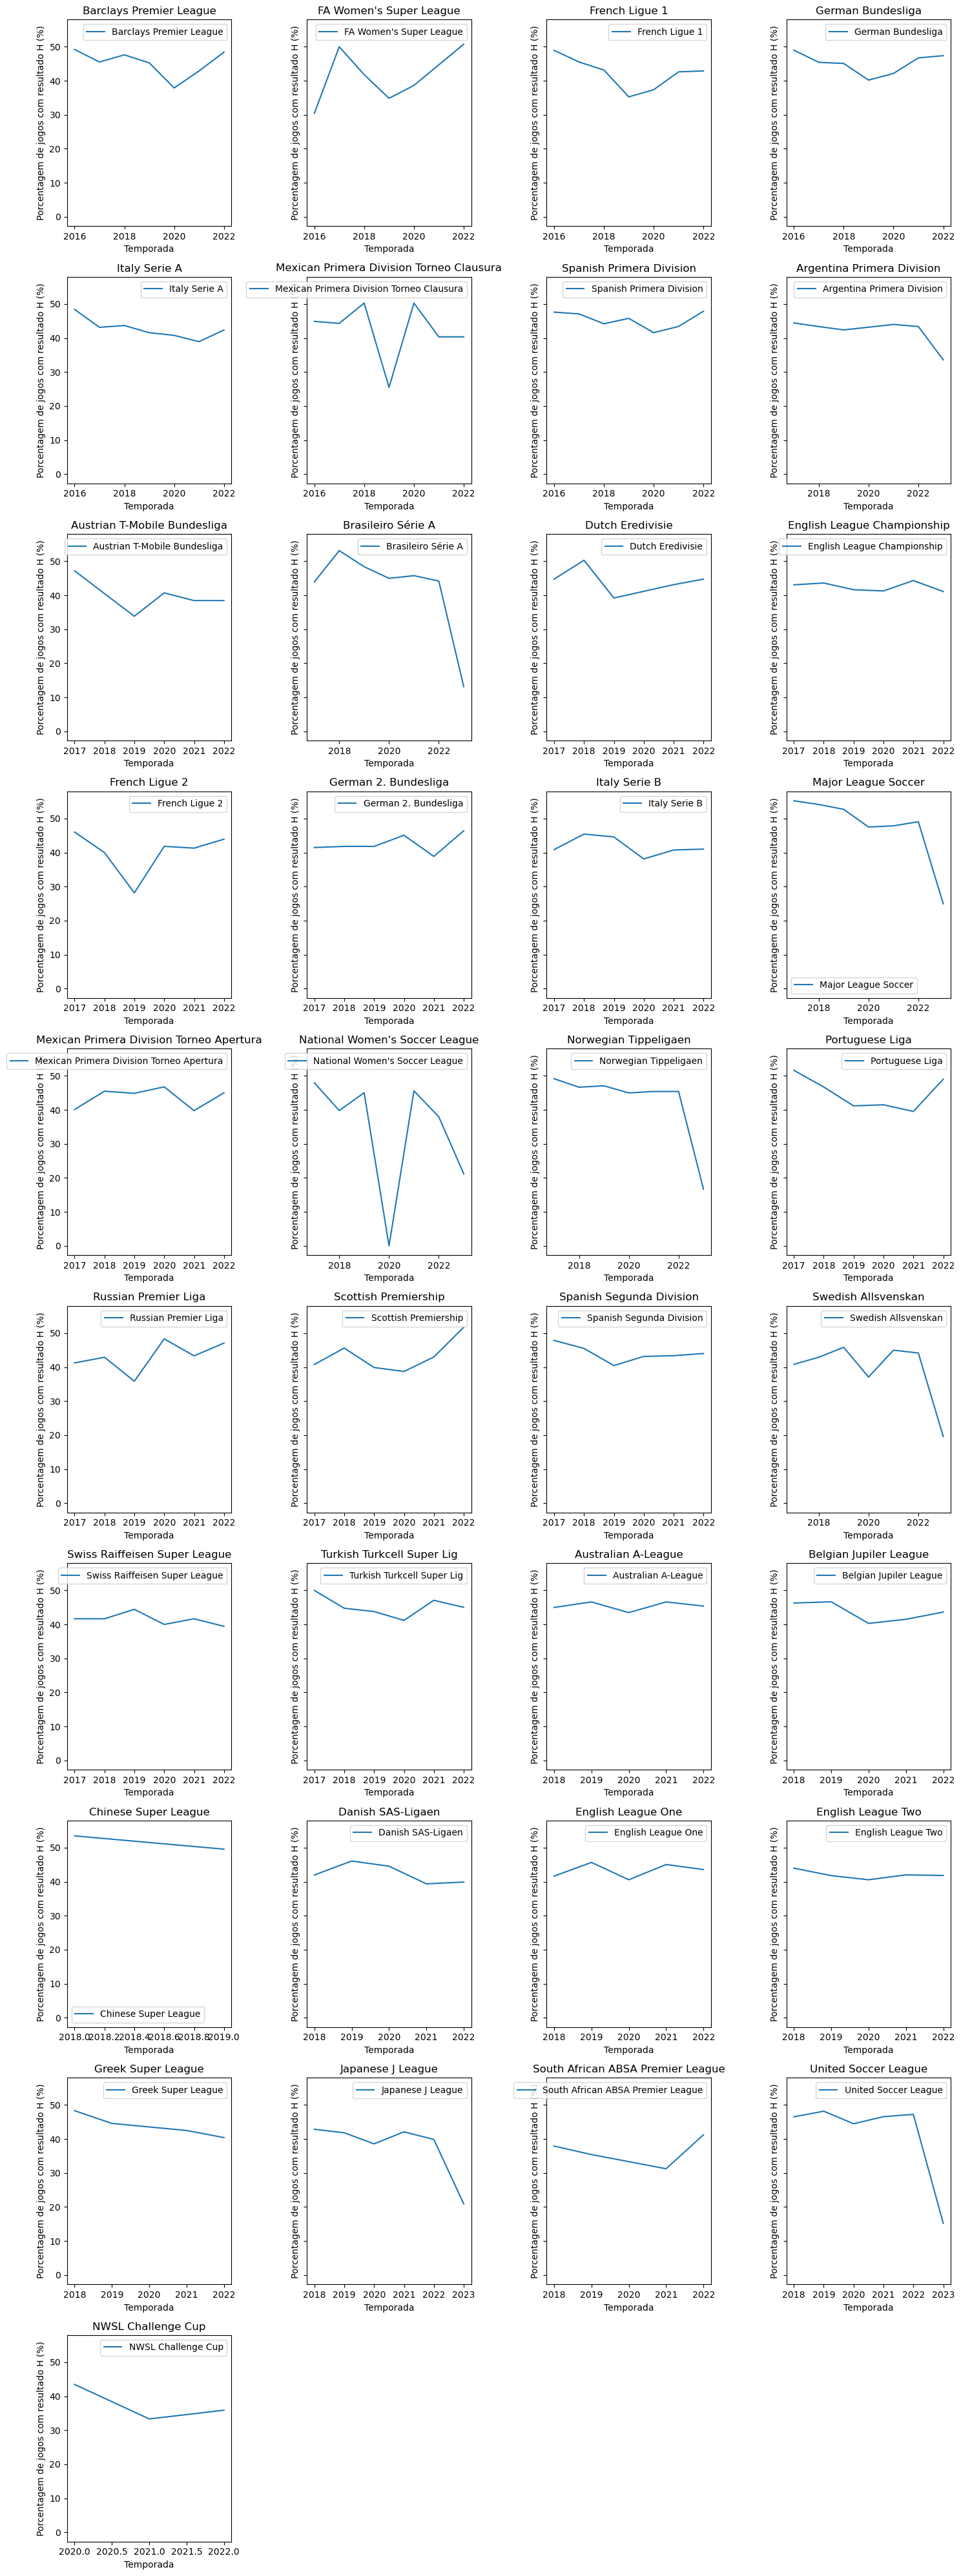

In [2]:
df['Porcentagem_H'] = 100 * (df['result'] == 'H').groupby([df['season'], df['league']]).transform('mean')

porcentagem_media = df.groupby(['season', 'league'])['Porcentagem_H'].mean().reset_index()

leagues = porcentagem_media['league'].unique()
num_leagues = len(leagues)

num_rows = (num_leagues - 1) // 4 + 1
num_cols = min(num_leagues, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), sharey=True)
axes = axes.flatten()

for i, league in enumerate(leagues):
    ax = axes[i]
    group = porcentagem_media[porcentagem_media['league'] == league]
    ax.plot(group['season'], group['Porcentagem_H'], label=league)
    ax.set_xlabel('Temporada')
    ax.set_ylabel('Porcentagem de jogos com resultado H (%)')
    ax.set_title(f'{league}')
    ax.legend()

# Remover subplots vazios
if num_leagues < len(axes):
    for j in range(num_leagues, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

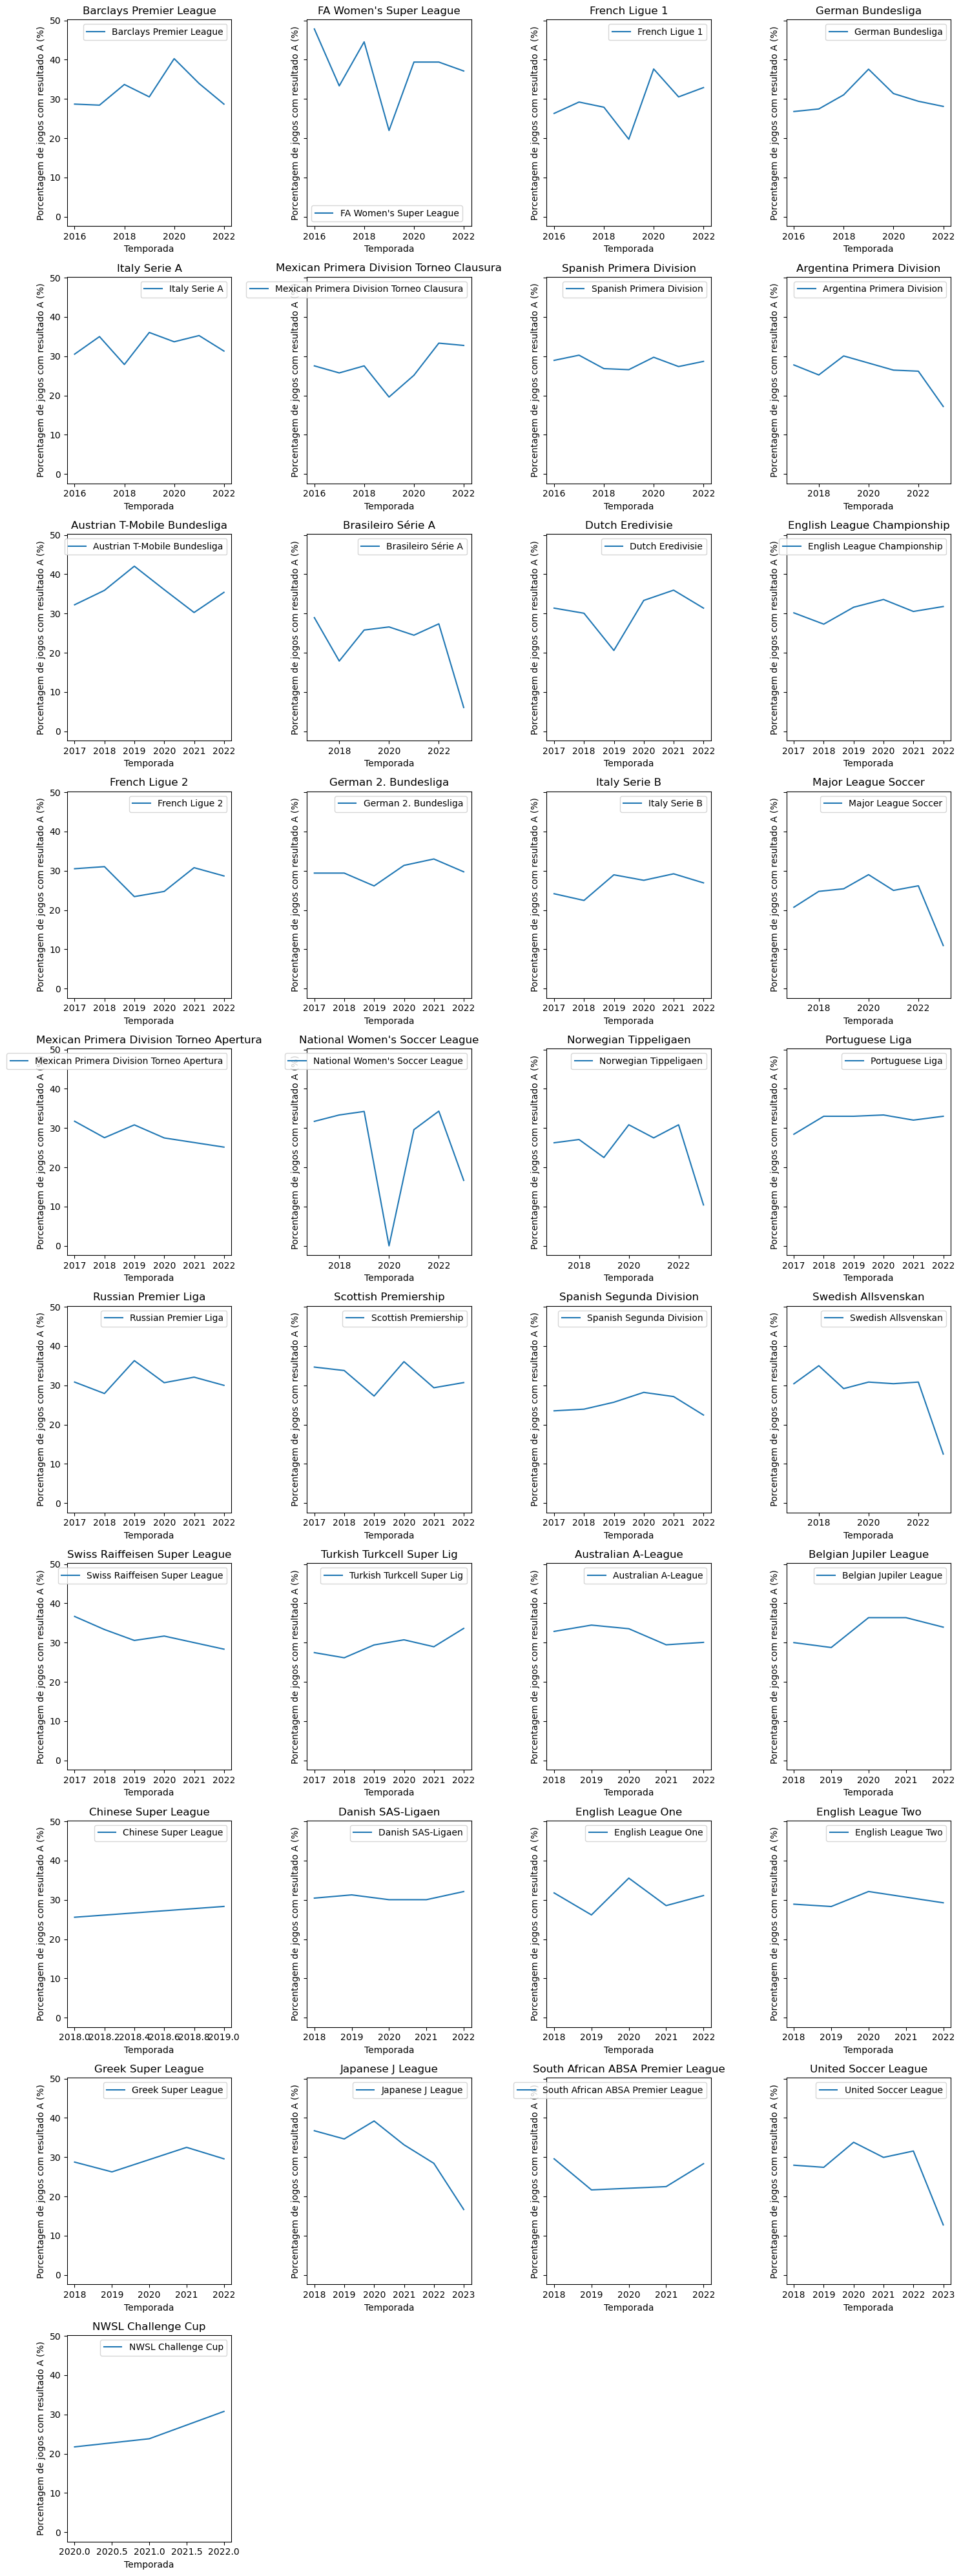

In [3]:
df['Porcentagem_A'] = 100 * (df['result'] == 'A').groupby([df['season'], df['league']]).transform('mean')

porcentagem_media = df.groupby(['season', 'league'])['Porcentagem_A'].mean().reset_index()

leagues = porcentagem_media['league'].unique()
num_leagues = len(leagues)

num_rows = (num_leagues - 1) // 4 + 1
num_cols = min(num_leagues, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), sharey=True)
axes = axes.flatten()

for i, league in enumerate(leagues):
    ax = axes[i]
    group = porcentagem_media[porcentagem_media['league'] == league]
    ax.plot(group['season'], group['Porcentagem_A'], label=league)
    ax.set_xlabel('Temporada')
    ax.set_ylabel('Porcentagem de jogos com resultado A (%)')
    ax.set_title(f'{league}')
    ax.legend()

# Remover subplots vazios
if num_leagues < len(axes):
    for j in range(num_leagues, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

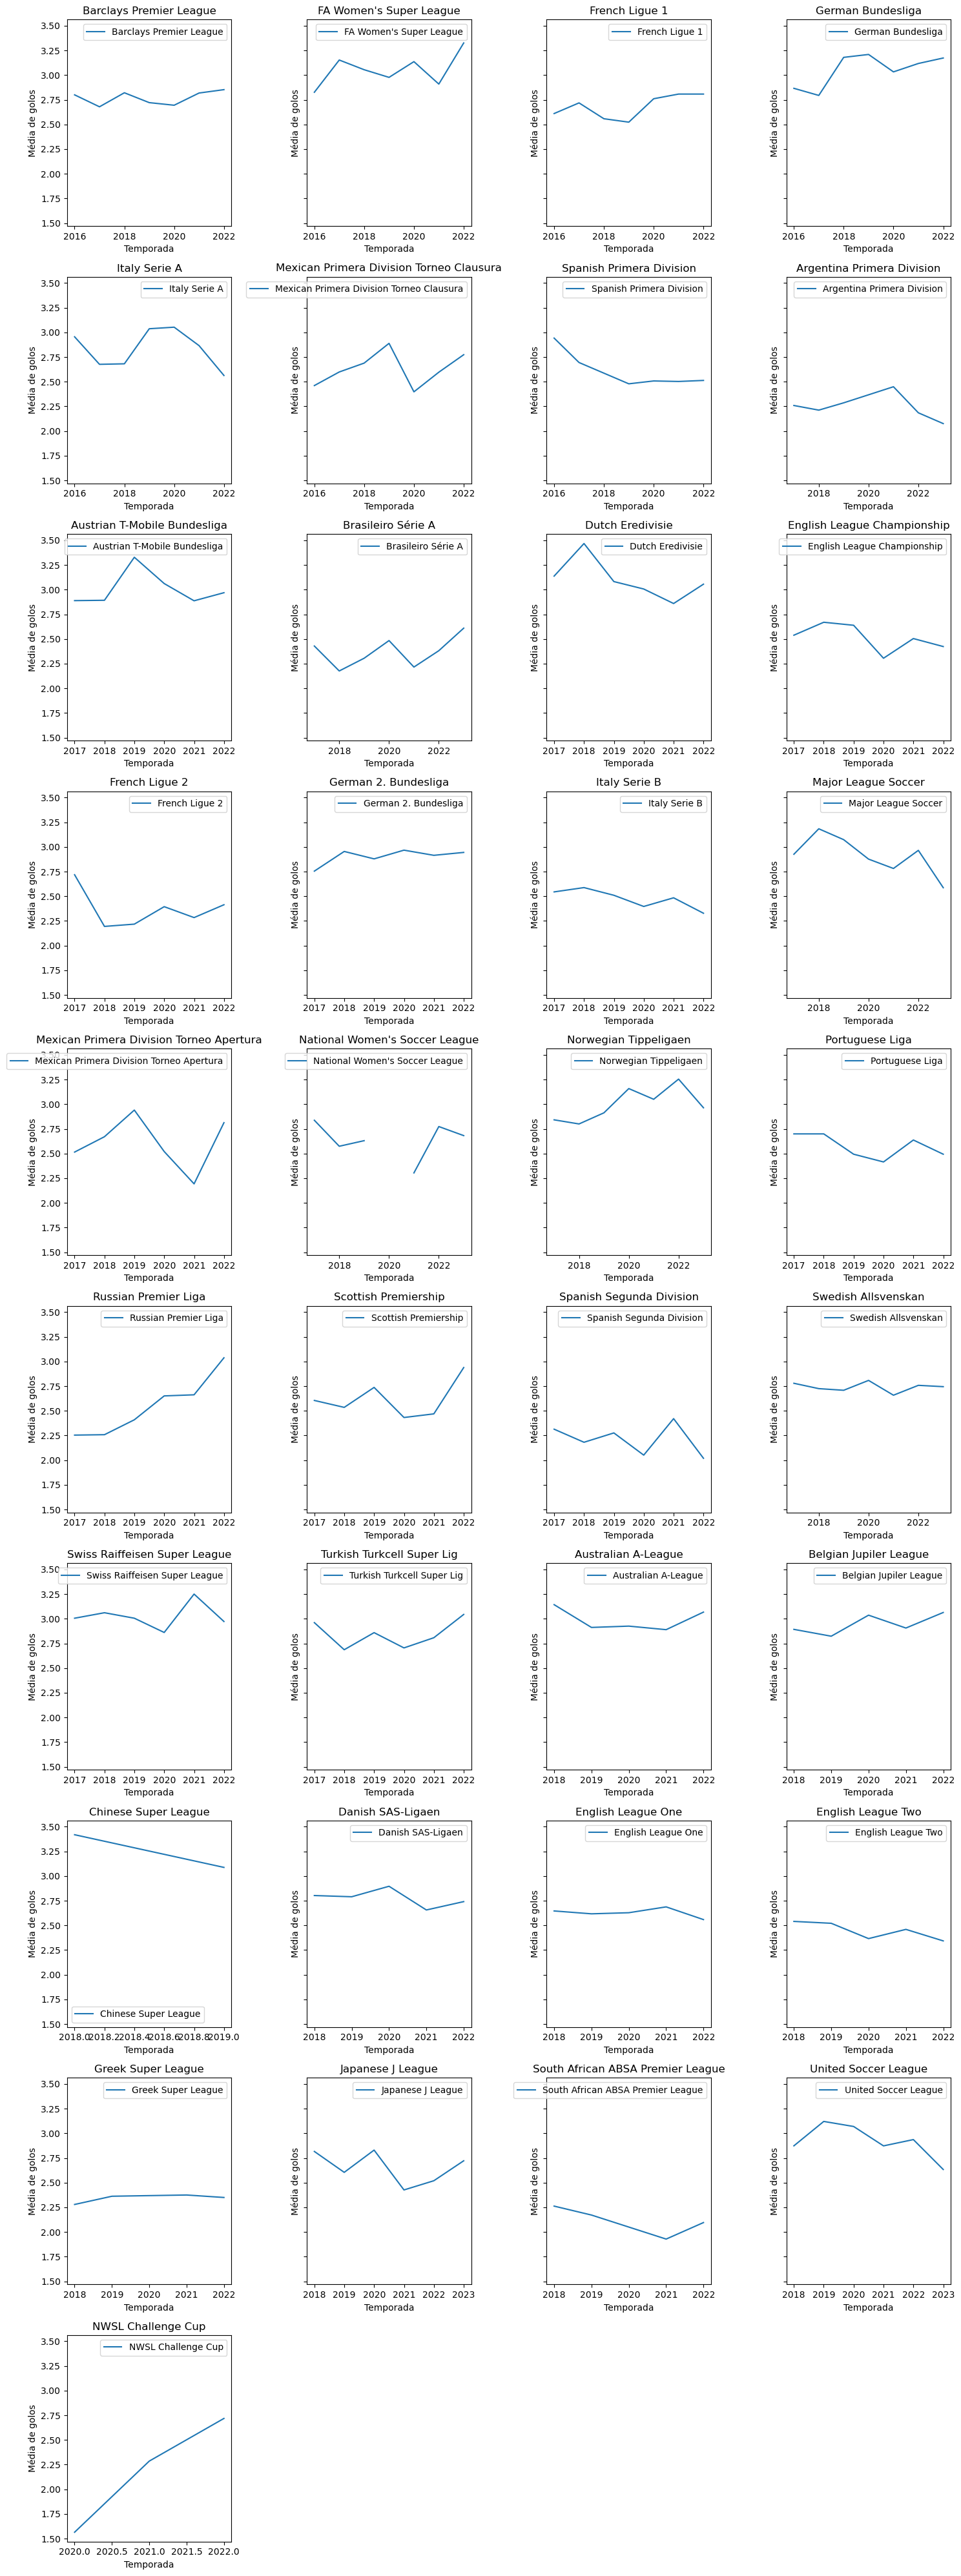

In [4]:
df['goals_total'] = df['score1'] + df['score2']

porcentagem_media = df.groupby(['season', 'league'])['goals_total'].mean().reset_index()

leagues = porcentagem_media['league'].unique()
num_leagues = len(leagues)

num_rows = (num_leagues - 1) // 4 + 1
num_cols = min(num_leagues, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), sharey=True)
axes = axes.flatten()

for i, league in enumerate(leagues):
    ax = axes[i]
    group = porcentagem_media[porcentagem_media['league'] == league]
    ax.plot(group['season'], group['goals_total'], label=league)
    ax.set_xlabel('Temporada')
    ax.set_ylabel('Média de golos')
    ax.set_title(f'{league}')
    ax.legend()

# Remover subplots vazios
if num_leagues < len(axes):
    for j in range(num_leagues, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Home Win Percentage by League')

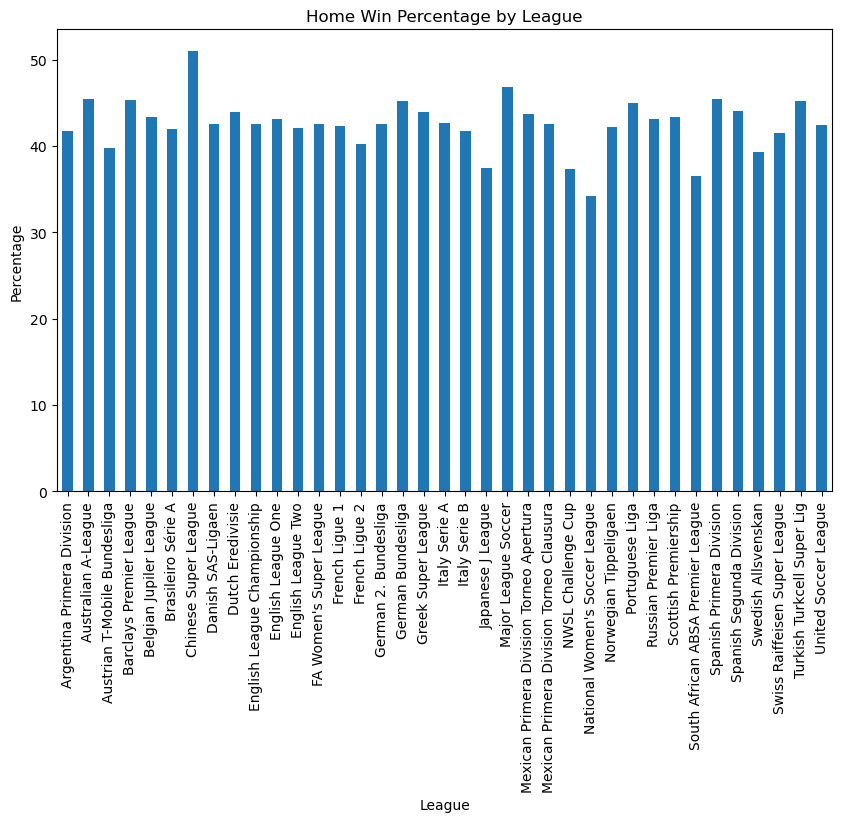

In [5]:
# Agrupar por 'league' e calcular a contagem total de jogos
total_counts = df.groupby('league').size()

# Filtrar apenas as vitórias da equipe da casa
home_wins = df[df['result'] == 'H']

# Agrupar por 'league' e contar as vitórias da equipe da casa
home_win_counts = home_wins.groupby('league').size()

# Calcular a porcentagem de vitórias da equipe da casa
home_win_percentage = (home_win_counts / total_counts) * 100

# Plotar o gráfico de barras das porcentagens de vitórias da equipe da casa
ax = home_win_percentage.plot(kind='bar', figsize=(10, 6))

# Configurar os rótulos dos eixos e o título
plt.xlabel('League')
plt.ylabel('Percentage')
plt.title('Home Win Percentage by League')

In [6]:
def movingAveragesFoulsCards(team):
    dfHomeGames = df[df['team1'] == team]
    dfAwayGames = df[df['team2'] == team]
    dfTotal = pd.concat([dfHomeGames,dfAwayGames])

    dfTotal.sort_index(inplace=True)

    dfTotal['Pontos'] = dfTotal.apply(lambda row: row['home_Points'] if row['team1'] == team else row['away_Points'],axis=1)
    
    coluna = 'Pontos'
    
    rows_to_update_home = dfHomeGames.index
    rows_to_update_away = dfAwayGames.index
    
    dfTotal[f'{coluna}_MA5'] = dfTotal[coluna].rolling(5, closed='left').mean()
    dfTotal[f'{coluna}_MA17'] = dfTotal[coluna].rolling(17, closed='left').mean()
    dfTotal[f'{coluna}_MA34'] = dfTotal[coluna].rolling(34, closed='left').mean()
    
    df.loc[rows_to_update_home, f'{coluna}_home_MA5'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA5']
    df.loc[rows_to_update_away, f'{coluna}_away_MA5'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA5']
    df.loc[rows_to_update_home, f'{coluna}_home_MA17'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA17']
    df.loc[rows_to_update_away, f'{coluna}_away_MA17'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA17']
    df.loc[rows_to_update_home, f'{coluna}_home_MA34'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA34']
    df.loc[rows_to_update_away, f'{coluna}_away_MA34'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA34']

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

for team in df['team1'].unique():
    movingAveragesFoulsCards(team)


In [7]:
df.groupby('Pontos_home_MA5')['result'].value_counts(normalize=True)

Pontos_home_MA5  result
0.0              A         0.437355
                 H         0.292343
                 D         0.270302
0.2              A         0.399336
                 H         0.358240
                 D         0.242424
0.4              H         0.384494
                 A         0.335047
                 D         0.280459
0.6              H         0.366977
                 A         0.366738
                 D         0.266285
0.8              H         0.389610
                 A         0.352441
                 D         0.257949
1.0              H         0.397212
                 A         0.327992
                 D         0.274796
1.2              H         0.421843
                 A         0.307330
                 D         0.270827
1.4              H         0.441219
                 A         0.292586
                 D         0.266195
1.6              H         0.454226
                 A         0.277280
                 D         0.268494
1.8 

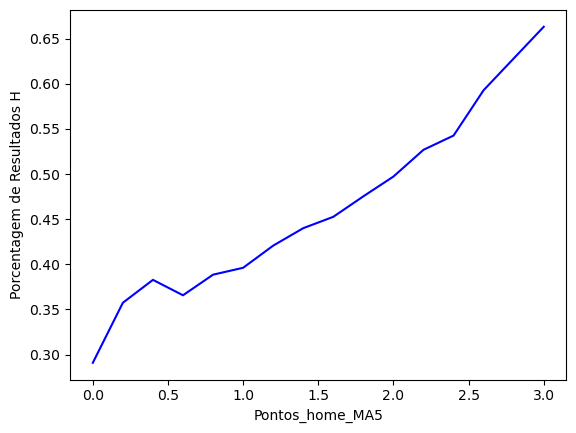

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado 'dados' com as colunas 'Pontos_home_MA5' e 'result'

# Agrupar os dados por 'Pontos_home_MA5' e calcular a média da coluna 'result' igual a 'H'
grouped_data = df.groupby('Pontos_home_MA5')['result'].apply(lambda x: (x == 'H').mean()).reset_index()

# Plotar o gráfico de linhas
fig, ax1 = plt.subplots()

# Gráfico de linhas (porcentagem de vezes que result == 'H')
ax1.plot(grouped_data['Pontos_home_MA5'], grouped_data['result'], color='blue')
ax1.set_ylabel('Porcentagem de Resultados H')
ax1.set_xlabel('Pontos_home_MA5')

plt.show()


In [9]:
grouped_data = df.groupby(['league','Pontos_home_MA5','season'])[['Porcentagem_H','prob1']].mean()
grouped_data['dif'] = grouped_data['Porcentagem_H'] - (grouped_data['prob1']*100)

In [10]:
grouped_data.sort_values(by='dif')

,,,Porcentagem_H,prob1,dif
league,Pontos_home_MA5,season,,,
Norwegian Tippeligaen,3.0,2023,16.666667,0.852550,-68.588333
National Women's Soccer League,1.8,2020,0.000000,0.630300,-63.030000
Norwegian Tippeligaen,2.6,2023,16.666667,0.752267,-58.560000
Brasileiro Série A,2.6,2023,13.157895,0.684025,-55.244605
Swedish Allsvenskan,2.2,2023,19.583333,0.733100,-53.726667
...,...,...,...,...,...
Mexican Primera Division Torneo Apertura,0.0,2019,44.864865,0.178750,26.989865
Swedish Allsvenskan,0.0,2019,45.833333,0.173750,28.458333
Austrian T-Mobile Bundesliga,0.0,2017,47.222222,0.187200,28.502222


In [11]:
equipas0 = df[df['Pontos_home_MA5'] == 0.0]
equipas0[equipas0['score1'].isna()]

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,away_Points,Porcentagem_H,Porcentagem_A,goals_total,Pontos_home_MA5,Pontos_away_MA5,Pontos_home_MA17,Pontos_away_MA17,Pontos_home_MA34,Pontos_away_MA34
31057,2019,2020-03-14,1843,French Ligue 1,Toulouse,Metz,59.96,49.87,0.2716,0.4572,...,NaN,35.263158,19.736842,NaN,0.0,1.4,0.058824,1.352941,0.470588,1.382353
31085,2019,2020-03-15,1832,Belgian Jupiler League,Waasland-Beveren,KAA Gent,28.46,64.08,0.1187,0.7144,...,NaN,46.666667,28.750000,NaN,0.0,1.4,0.764706,1.941176,0.735294,1.882353
67532,2023,2023-06-17,2160,United Soccer League,Birmingham Legion FC,Indy Eleven,15.73,11.90,0.4920,0.2414,...,NaN,15.196078,12.745098,NaN,0.0,1.4,1.176471,1.294118,1.558824,1.058824
67577,2023,2023-06-22,2105,Brasileiro Série A,Vasco da Gama,Goiás,51.02,39.59,0.5881,0.1825,...,NaN,13.157895,6.052632,NaN,0.0,1.0,0.705882,0.941176,0.852941,1.088235


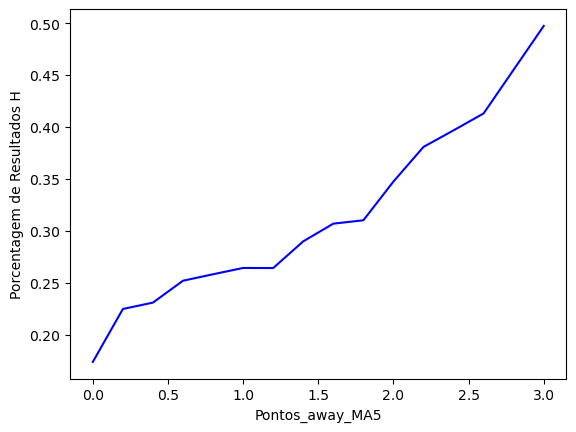

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado 'dados' com as colunas 'Pontos_home_MA5' e 'result'

# Agrupar os dados por 'Pontos_home_MA5' e calcular a média da coluna 'result' igual a 'H'
grouped_data = df.groupby('Pontos_away_MA5')['result'].apply(lambda x: (x == 'A').mean()).reset_index()

# Plotar o gráfico de linhas
fig, ax1 = plt.subplots()

# Gráfico de linhas (porcentagem de vezes que result == 'H')
ax1.plot(grouped_data['Pontos_away_MA5'], grouped_data['result'], color='blue')
ax1.set_ylabel('Porcentagem de Resultados H')
ax1.set_xlabel('Pontos_away_MA5')

plt.show()


In [13]:
grouped_data = df.groupby(['league','Pontos_away_MA5','season'])[['Porcentagem_A','prob2']].mean()
grouped_data['dif'] = grouped_data['Porcentagem_A'] - (grouped_data['prob2']*100)
grouped_data.sort_values(by='dif').tail(20)

Porcentagem_A     prob2  \
league                        Pontos_away_MA5 season                            
French Ligue 1                0.0             2020        37.631579  0.164467   
Austrian T-Mobile Bundesliga  0.2             2019        42.051282  0.208000   
                              0.0             2019        42.051282  0.205950   
FA Women's Super League       0.4             2018        44.545455  0.229525   
                              1.8             2021        39.393939  0.175830   
Swiss Raiffeisen Super League 0.2             2020        31.666667  0.094150   
FA Women's Super League       0.0             2021        39.393939  0.165550   
                              0.4             2016        47.826087  0.247100   
Russian Premier Liga          0.0             2017        30.833333  0.070620   
Austrian T-Mobile Bundesliga  0.4             2019        42.051282  0.179400   
                              0.6             2019        42.051282  0.172758   
                              0.0             2017        32.222222  0.072500   
Turkish Turkcell Super Lig    0.0             2022        33.625731  0.085360   
Austrian T-Mobile Bundesliga  0.0             2018        35.897436  0.106400   
FA Women's Super League       0.6             2018        44.545455  0.192380   
                              0.4             2020        39.393939  0.140338   
Swedish Allsvenskan           0.0             2018        35.000000  0.091333   
FA Women's Super League       0.4             2022        37.121212  0.105000   
                              0.2             2016        47.826087  0.211000   
                              0.0             2018        44.545455  0.173117   

                                                            dif  
league                        Pontos_away_MA5 season             
French Ligue 1                0.0             2020    21.184912  
Austrian T-Mobile Bundesliga  0.2             2019    21.251282  
                              0.0             2019    21.456282  
FA Women's Super League       0.4             2018    21.592955  
                              1.8             2021    21.810939  
Swiss Raiffeisen Super League 0.2             2020    22.251667  
FA Women's Super League       0.0             2021    22.838939  
                              0.4             2016    23.116087  
Russian Premier Liga          0.0             2017    23.771333  
Austrian T-Mobile Bundesliga  0.4             2019    24.111282  
                              0.6             2019    24.775449  
                              0.0             2017    24.972222  
Turkish Turkcell Super Lig    0.0             2022    25.089731  
Austrian T-Mobile Bundesliga  0.0             2018    25.257436  
FA Women's Super League       0.6             2018    25.307455  
                              0.4             2020    25.360189  
Swedish Allsvenskan           0.0             2018    25.866667  
FA Women's Super League       0.4             2022    26.621212  
                              0.2             2016    26.726087  
                              0.0             2018    27.233788

In [14]:
pd.set_option('display.max_columns', 500)


In [15]:
equipas0 = pd.concat([df[df['Pontos_away_MA5'] == 0.0],df[df['Pontos_away_MA5'] == 0.2]])
equipas0

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result,home_Points,away_Points,Porcentagem_H,Porcentagem_A,goals_total,Pontos_home_MA5,Pontos_away_MA5,Pontos_home_MA17,Pontos_away_MA17,Pontos_home_MA34,Pontos_away_MA34
402,2016,2016-10-15,1845,German Bundesliga,Borussia Monchengladbach,Hamburg SV,71.92,59.39,0.6211,0.1515,0.2275,1.70,0.77,33.1,44.3,0.0,0.0,3.88,0.24,2.55,0.53,0.00,0.00,D,1.0,1.0,49.019608,26.797386,0.0,1.4,0.0,NaN,NaN,NaN,NaN
403,2016,2016-10-15,1845,German Bundesliga,FC Cologne,FC Ingolstadt 04,71.17,55.81,0.5658,0.1708,0.2634,1.40,0.67,50.5,42.4,2.0,1.0,3.37,1.07,1.24,0.77,2.10,1.05,H,3.0,0.0,49.019608,26.797386,3.0,1.8,0.0,NaN,NaN,NaN,NaN
486,2016,2016-10-22,1869,Spanish Primera Division,Granada,Sporting Gijón,50.06,58.84,0.4073,0.3103,0.2825,1.29,1.15,34.8,38.0,0.0,0.0,0.56,0.26,0.65,0.85,0.00,0.00,D,1.0,1.0,47.631579,28.947368,0.0,0.2,0.0,NaN,NaN,NaN,NaN
514,2016,2016-10-26,1854,Italy Serie A,Fiorentina,Crotone,68.28,46.28,0.7174,0.0836,0.1990,2.05,0.71,NaN,NaN,1.0,1.0,1.61,0.66,2.79,0.36,1.05,1.05,D,1.0,1.0,48.421053,30.526316,2.0,1.2,0.0,NaN,NaN,NaN,NaN
529,2016,2016-10-29,2411,Barclays Premier League,Watford,Hull City,61.69,44.70,0.5964,0.1620,0.2416,1.82,0.84,19.8,44.4,1.0,0.0,1.27,0.26,2.20,0.58,1.05,0.00,H,3.0,0.0,49.210526,28.684211,1.0,1.6,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67483,2023,2023-06-11,1947,Japanese J League,Kashima Antlers,Shonan Bellmare,42.55,25.72,0.6109,0.1727,0.2163,1.77,0.82,35.6,20.8,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,H,3.0,0.0,20.915033,16.666667,1.0,1.8,0.2,1.529412,1.058824,1.382353,1.176471
67494,2023,2023-06-11,1859,Norwegian Tippeligaen,Bodo/Glimt,Hamarkamaratene,62.67,17.56,0.8888,0.0252,0.0860,3.21,0.43,55.7,48.5,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,H,3.0,0.0,16.666667,10.416667,3.0,3.0,0.2,2.705882,0.882353,2.323529,0.941176
67503,2023,2023-06-11,2105,Brasileiro Série A,Internacional,Vasco da Gama,54.14,51.08,0.4909,0.2551,0.2540,1.62,1.09,21.9,34.1,2.0,1.0,1.73,1.23,1.28,1.09,2.10,1.05,H,3.0,0.0,13.157895,6.052632,3.0,0.8,0.2,1.764706,0.882353,1.852941,0.852941
67526,2023,2023-06-17,4582,National Women's Soccer League,San Diego Wave FC,Angel City FC,56.52,42.34,0.6110,0.1578,0.2312,1.89,0.84,19.2,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.212121,16.666667,NaN,2.2,0.2,1.647059,0.764706,1.647059,1.205882
